In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(15,10)})

['who-suicide-statistics', 'the-human-freedom-index', 'mental-health-in-tech-survey', 'suicide-rates-overview-1985-to-2016', 'world-happiness', 'health-nutrition-and-population-statistics']


In [2]:
wh = pd.read_csv('../input/who-suicide-statistics/who_suicide_statistics.csv')

In [3]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [4]:
wh.dropna(inplace=True)

In [5]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
country        36060 non-null object
year           36060 non-null int64
sex            36060 non-null object
age            36060 non-null object
suicides_no    36060 non-null float64
population     36060 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [6]:
wh.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [7]:
#https://www.kaggle.com/kikexclusive/curiosity-didn-t-kill-the-cat-all-in-one
from IPython.display import display, HTML
display(wh.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,36060,118,Hungary,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,36060,NaN,NaN,NaN,1998.94,10.1639,1979,1991,2000,2008,2016
sex,36060,2,female,18030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,36060,6,75+ years,6010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,36060,NaN,NaN,NaN,221.81,855.449,0,2,21,116,22338
population,36060,NaN,NaN,NaN,1.7e+06,3.69781e+06,259,80566,375765,1.3449e+06,4.38052e+07


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


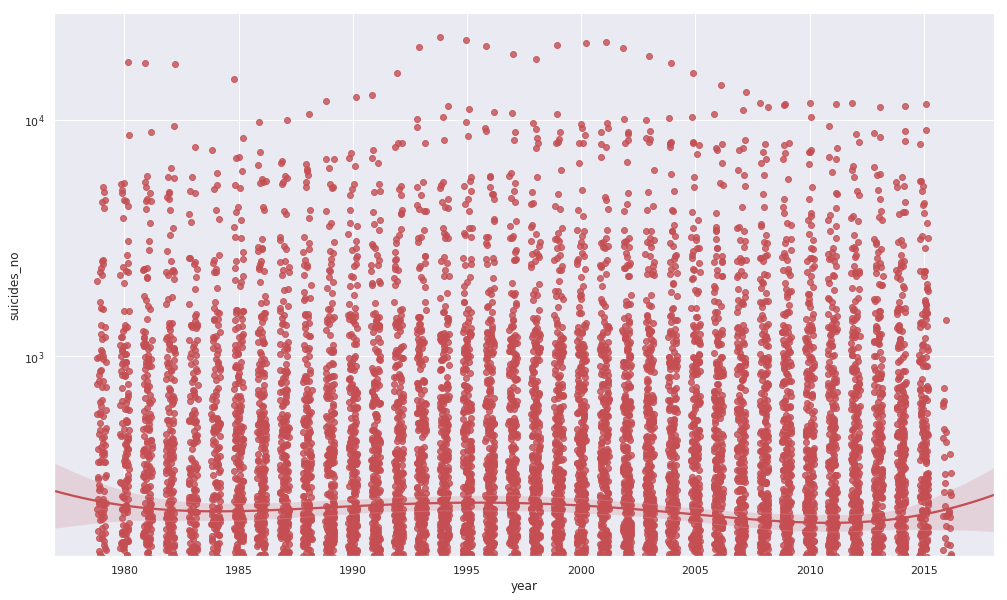

In [14]:
sns.set(style="dark")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=wh, x='year', y='suicides_no', x_jitter=0.2, order=4, color='r')
ax.set_yscale('log')

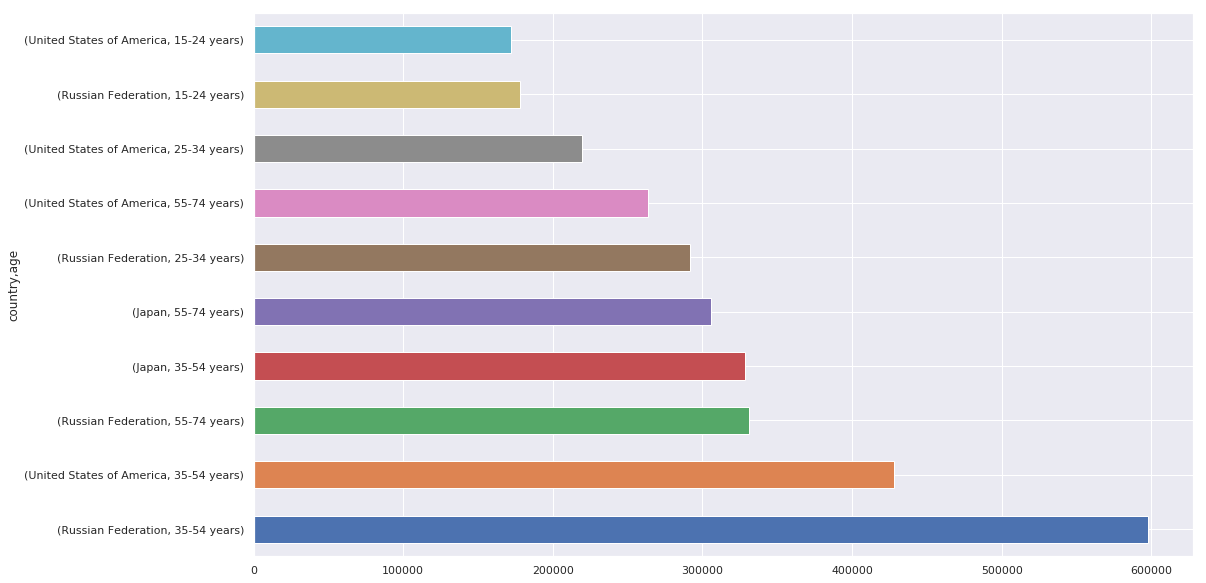

In [15]:
wh.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


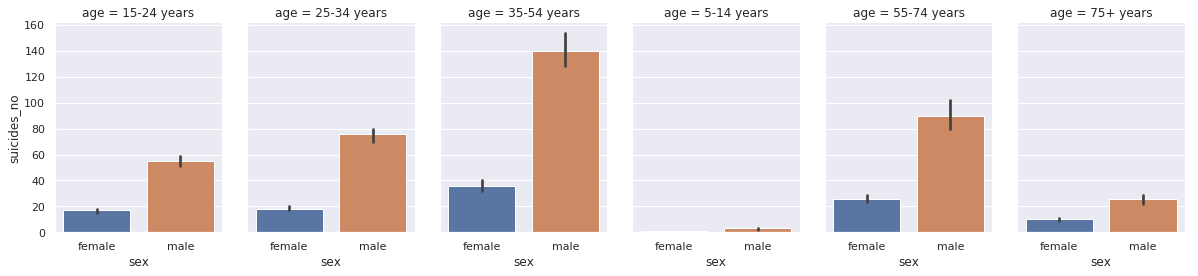

In [16]:
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner
from numpy import median
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=wh, estimator=median,height=4, aspect=.7,kind='bar')

In [17]:
wh['age'] = wh.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))

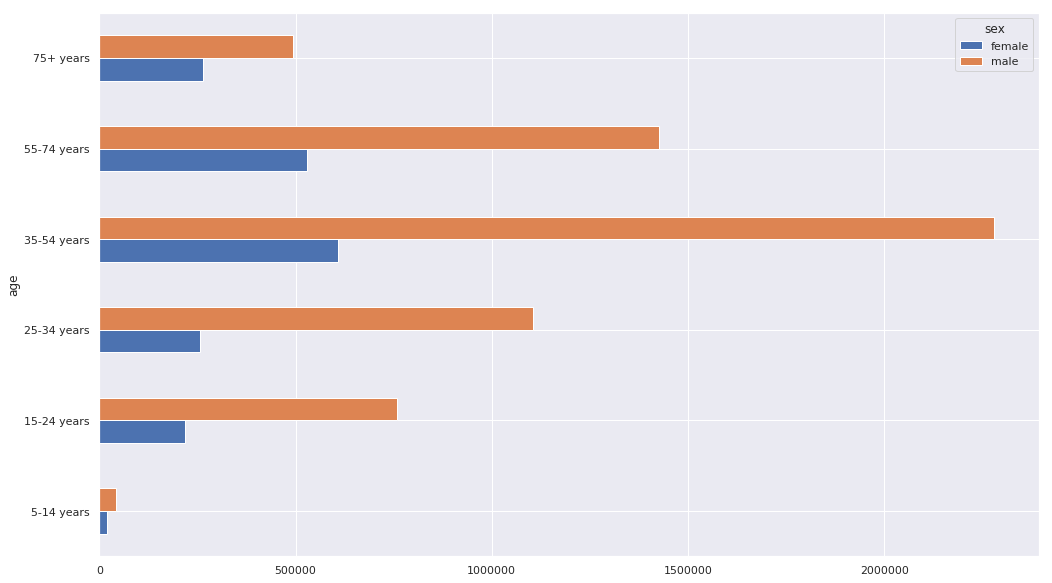

In [18]:
wh.pivot_table(index='age',columns='sex',values='suicides_no', aggfunc='sum').plot(kind='barh')

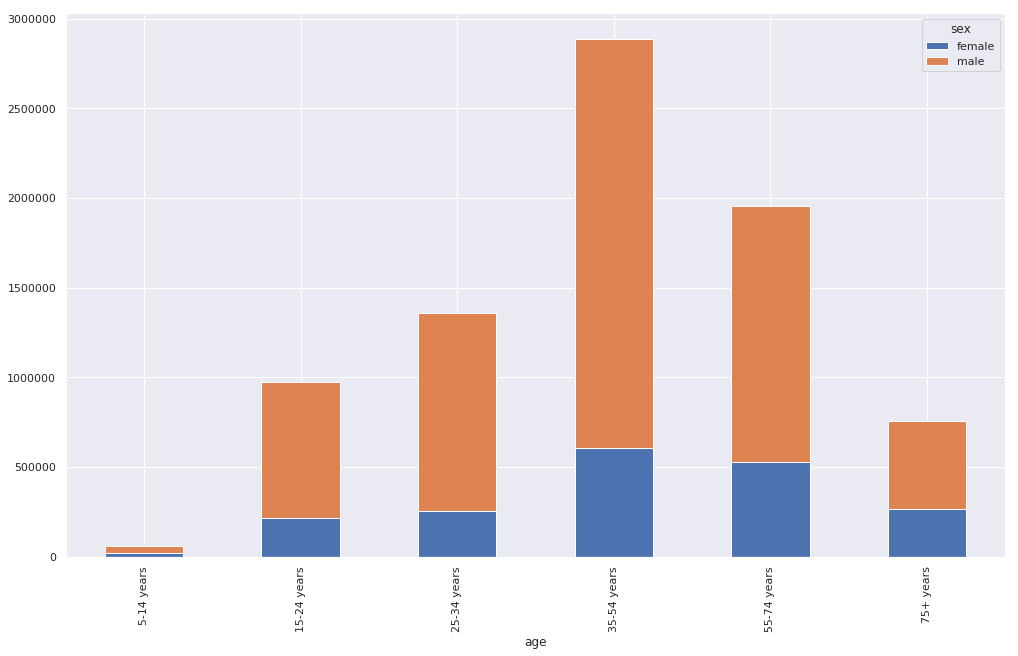

In [19]:
wh.groupby(by=['age','sex'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)

In [20]:
wh.groupby(by=['age','sex'])['suicides_no'].sum().unstack().reset_index().melt(id_vars='age')

,age,sex,value
0,5-14 years,female,20152.0
1,15-24 years,female,218309.0
2,25-34 years,female,256427.0
3,35-54 years,female,607420.0
4,55-74 years,female,528359.0
5,75+ years,female,263627.0
6,5-14 years,male,42168.0
7,15-24 years,male,757391.0
8,25-34 years,male,1104353.0
9,35-54 years,male,2280320.0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


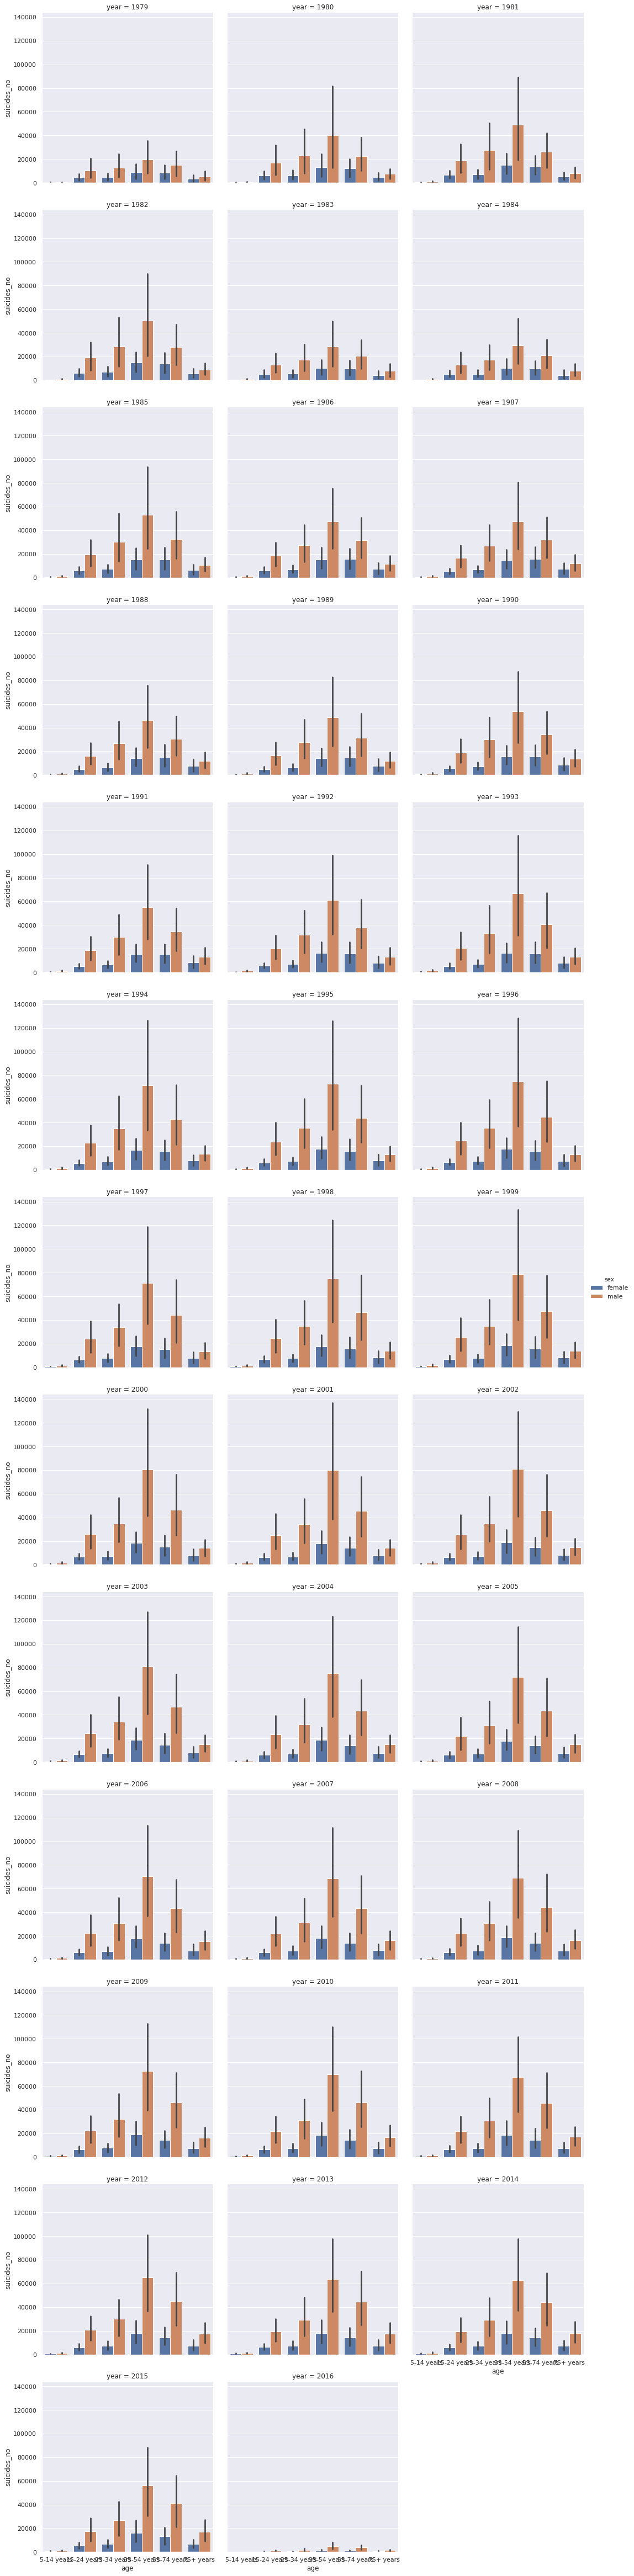

In [21]:
from numpy import sum
sns.catplot('age','suicides_no',hue='sex',col='year',data=wh,kind='bar',col_wrap=3,estimator=sum)

In [ ]:
#wh.groupby(['year','age']).suicides_no.sum().reset_index()

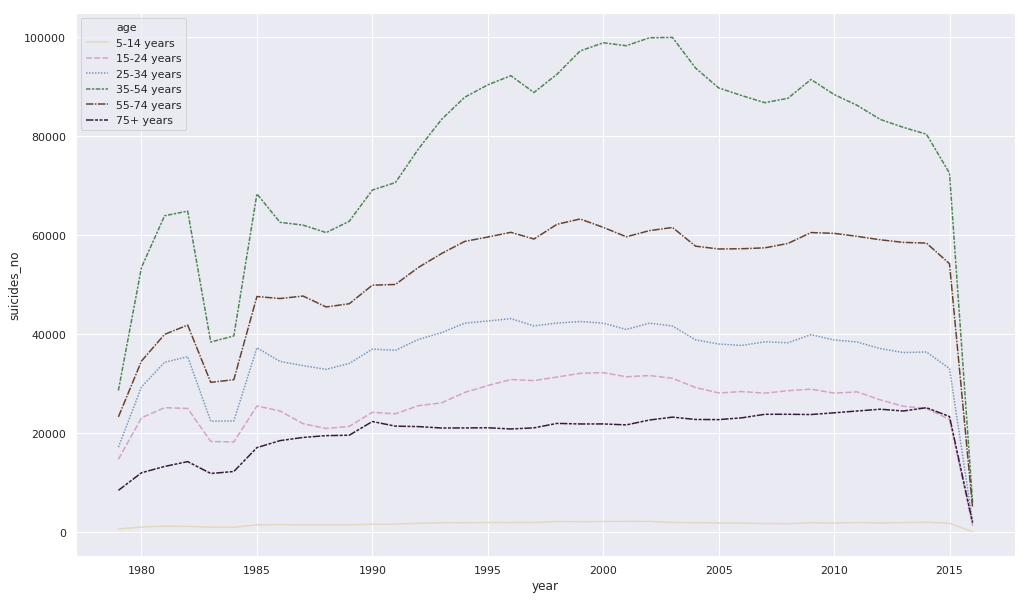

In [27]:
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
from matplotlib.colors import NoNorm
df = wh.groupby(['year','age']).suicides_no.sum().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=NoNorm(),palette="ch:2.5,1.9",sort=False)

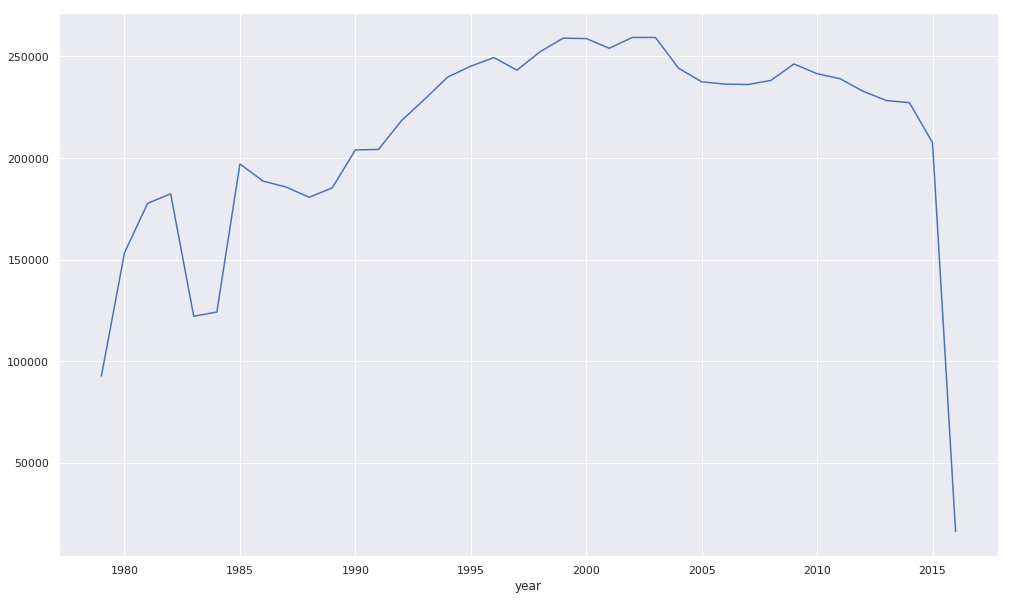

In [28]:
#wh.groupby(['year']).suicides_no.sum().plot()

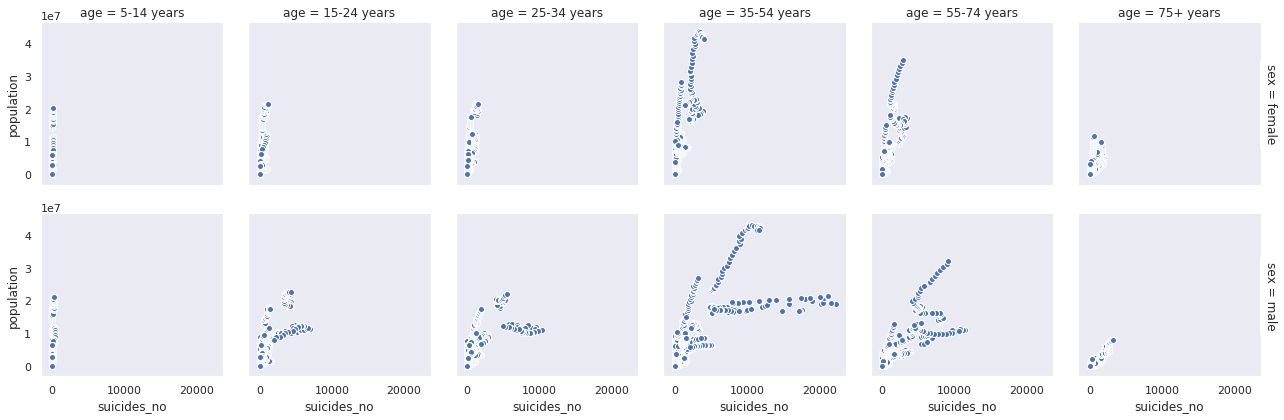

In [29]:
#https://seaborn.pydata.org/examples/faceted_histogram.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")
g = sns.FacetGrid(wh, row="sex", col="age", margin_titles=True)
g.map(plt.scatter, "suicides_no","population", edgecolor="w")

In [ ]:
#https://seaborn.pydata.org/examples/faceted_histogram.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(wh, row="year", col="age",hue='sex',margin_titles=True)

(g.map(plt.scatter, "suicides_no","population", edgecolor="w")).add_legend()

In [ ]:

g = sns.FacetGrid(wh.groupby(['country','year']).suicides_no.sum().reset_index(), col="country", col_wrap=3)
g = g.map(plt.plot, "year", "suicides_no", marker=".")

In [ ]:
p = pd.crosstab(index=wh.country,columns=wh.year,values=wh.suicides_no,aggfunc='sum')

sns.heatmap(p.loc[:,2011:2015].sort_values(2015, ascending=False).dropna().head(5),annot=True)

pp = pd.crosstab(index=wh.country,columns=wh.year,values=wh.population,aggfunc='sum')

pdivpp = p/pp*10000

#sns.heatmap(pdivpp.loc[:,2006:2015].sort_values(2015, ascending=False).dropna().head(5),annot=True)



In [ ]:
wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15).plot(x='country',y='suicides_no',kind='barh')

In [ ]:
happiness = pd.read_csv('../input/world-happiness/2015.csv')

In [ ]:
#happiness[['Happiness Score','Region']].groupby('Region')['Happiness Score'].median().reset_index().sort_values('Happiness Score')

In [ ]:
happiness.columns

In [ ]:
#sns.set(rc={'figure.figsize':(15,15)})

#g = sns.FacetGrid(happiness, col="Region",  margin_titles=True, col_wrap=3)

#(g.map(plt.scatter, "Generosity","Happiness Score", edgecolor="w")).add_legend()
#g = sns.lmplot("Freedom","Generosity",aspect=.4,hue='Region',col='Region',col_wrap=2, data=happiness)
#g.fig.set_size_inches(15,15)


In [ ]:
happiness[happiness.Country.str.contains("Russia")]
countries = ['Russia','United States','Japan','France','Ukraine','Germany','South Korea',
'Brazil','Poland','United Kingdom','Italy','Hungary','Thailand','Canada','Kazakhstan']
happiness_dr = happiness[happiness.Country.isin(countries)].drop('Region',axis=1).set_index('Country')
sns.set(rc={'figure.figsize':(15,15)})
happiness_dr['Happiness Rank'].plot(kind='barh', title='Happiness Rank 2015 for countries listed above')



#happiness[happiness.Country.str.contains("Kazakhstan")]
#happiness[happiness.Country.isin(wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15))]

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
#g = sns.FacetGrid(happiness, col="Region",  margin_titles=True, col_wrap=3)

#(g.map(plt.scatter, "Generosity","Happiness Score", edgecolor="w")).add_legend()
sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Region', data=happiness)

In [ ]:
# from sklearn import preprocessing

# x = happiness.values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# happiness_scaled = pd.DataFrame(x_scaled)
# happiness_scaled.columns = happiness.columns
# happiness_scaled.index = happiness.index
# sns.set(rc={'figure.figsize':(15,30)})
# happiness_scaled[['Family','Health (Life Expectancy)','Freedom','Generosity']].plot(kind='barh',title='Happiness data 2015')

In [ ]:
#wh.groupby(by=['year','country'])['suicides_no'].max().reset_index().sort_values(['suicides_no'],ascending=False).head(34)

In [ ]:
#wh.pivot_table(index='year',columns='sex',values='suicides_no', aggfunc='sum').plot(kind='barh')
sns.set(rc={'figure.figsize':(10,7)})
wh.pivot_table(index='year',columns='sex',values='suicides_no', aggfunc='sum').plot()

In [ ]:
wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15).country

In [ ]:
wh[wh.country.isin(wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(5).country)].groupby(by=['sex','country'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)

In [ ]:
#wh[wh.country.isin(wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(5).country)].groupby(by=['age','country'])['suicides_no'].sum().unstack().plot(kind='bar',stacked=True)

In [ ]:
#https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframehttps://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
#wh[wh.country.isin(wh.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(5).country)].groupby(by=['year','country'])['suicides_no'].sum().unstack().plot()

In [ ]:
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper
from bokeh.io import output_notebook

output_notebook()

source = ColumnDataSource(
        data=wh
    )

hover = HoverTool(
        tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("country", "@country"),
            ("suicides_no","@suicides_no")
        ]
    )

p = figure(plot_width=700, plot_height=700, tools=[hover],
           title="Mouse over the dots")
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
factors = list(wh.sex.unique())
colors = ["red","green"]
mapper = CategoricalColorMapper(factors = factors,palette = colors)
p.circle('suicides_no', 'year', size=4, source=source,
    legend='sex', fill_alpha=0.2, color = {"field":"sex","transform":mapper})

show(p)

In [ ]:
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper
from bokeh.io import output_notebook

output_notebook()

source = ColumnDataSource(
        data=wh
    )

hover = HoverTool(
        tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("country", "@country"),
            ("suicides_no","@suicides_no")
        ]
    )

p = figure(plot_width=700, plot_height=700, tools=[hover],
           title="Mouse over the dots")
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
#factors = list(wh.age.unique())
factors = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
colors = ["deepskyblue","maroon","green","peru","greenyellow","yellow"]
mapper = CategoricalColorMapper(factors = factors,palette = colors)
p.circle('suicides_no', 'year', size=4, source=source,
    legend='age', fill_alpha=0.2, color = {"field":"age","transform":mapper})

show(p)

In [ ]:
#wh.plot.scatter(x='population',y='suicides_no')
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper
from bokeh.io import output_notebook

output_notebook()

source = ColumnDataSource(
        data=wh
    )


Tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("country", "@country"),
            ("suicides_no","@suicides_no"),
            ("population","@population")
        ]
p = figure(plot_width=700, plot_height=700,  tooltips=Tooltips,
           title="Mouse over the dots" )
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
factors = list(wh.sex.unique())
colors = ["red","green"]
mapper = CategoricalColorMapper(factors = factors,palette = colors)
p.circle('suicides_no', 'population', size=4, source=source,
    legend='sex', fill_alpha=0.2, color = {"field":"sex","transform":mapper})

show(p)

In [ ]:
#wh.plot.scatter(x='population',y='suicides_no')
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
'''from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper
from bokeh.io import output_notebook

output_notebook()

source = ColumnDataSource(
        data=wh[wh.suicides_no>0]
    )

hover = HoverTool(
        tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("country", "@country"),
            ("suicides_no","@suicides_no"),
            ("population","@population")
        ]
    )

p = figure(plot_width=700, plot_height=700, tools=[hover],
           title="Mouse over the dots" ,y_axis_type="log")
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
factors = list(wh.sex.unique())
colors = ["red","green"]
mapper = CategoricalColorMapper(factors = factors,palette = colors)
p.circle('suicides_no', 'population', size=4, source=source,
    legend='sex', fill_alpha=0.2, color = {"field":"sex","transform":mapper})

show(p)'''

In [ ]:
#https://pythonspot.com/3d-scatterplot/
#https://matplotlib.org/gallery/mplot3d/scatter3d.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import RobustScaler 
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
rob_scaler = RobustScaler()

wh['scaled_population'] = rob_scaler.fit_transform(wh['population'].values.reshape(-1,1))
wh['scaled_suicides_no'] = rob_scaler.fit_transform(wh['suicides_no'].values.reshape(-1,1))
 
# Create plot
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
#ax.set_xscale('log')
wh = wh[wh.suicides_no>0]
ax.scatter(wh[wh.sex=='female'].scaled_population, wh[wh.sex=='female'].year, wh[wh.sex=='female'].scaled_suicides_no, alpha=0.2, c="red", edgecolors='none', s=30, label="female") 
ax.scatter(wh[wh.sex=='male'].scaled_population, wh[wh.sex=='male'].year, wh[wh.sex=='male'].scaled_suicides_no, alpha=0.2, c="green", edgecolors='none', s=30, label="male")


 
plt.title('Matplot 3d scatter plot')
plt.legend(loc=2)
plt.show()

In [ ]:
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
#https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/legends.html#userguide-interaction-legends
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper
from bokeh.io import output_notebook

output_notebook()



hover = HoverTool(
        tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("country", "@country"),
            ("suicides_no","@suicides_no")
        ]
    )

p = figure(plot_width=800, plot_height=700,  tools=[hover],
           title="Click on Legend to hide an age category")
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
#factors = list(wh.age.unique())
factors = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
source0 = ColumnDataSource(
        data=wh[wh.age==factors[0]]
    )
source1 = ColumnDataSource(
        data=wh[wh.age==factors[1]]
    )
source2 = ColumnDataSource(
        data=wh[wh.age==factors[2]]
    )
source3 = ColumnDataSource(
        data=wh[wh.age==factors[3]]
    )
source4 = ColumnDataSource(
        data=wh[wh.age==factors[4]]
    )
source5 = ColumnDataSource(
        data=wh[wh.age==factors[5]]
    )

colors = ["black","sienna","blue","yellow","darkgreen","lightcoral"]
mapper = CategoricalColorMapper(factors = factors,palette = colors)
#p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range), source=source,
#    legend='age', fill_alpha=0.2, color = {"field":"age","transform":mapper})

#p.circle(wh[wh.age==factors[0]].suicides_no, wh[wh.age==factors[0]].year, color=colors[0], alpha=0.8, legend=factors[0])
#p.circle(wh[wh.age==factors[1]].suicides_no, wh[wh.age==factors[1]].year, color=colors[1], alpha=0.8, legend=factors[1])
#p.circle(wh[wh.age==factors[2]].suicides_no, wh[wh.age==factors[2]].year, color=colors[2], alpha=0.8, legend=factors[2])
#p.circle(wh[wh.age==factors[3]].suicides_no, wh[wh.age==factors[3]].year, color=colors[3], alpha=0.8, legend=factors[3])
#p.circle(wh[wh.age==factors[4]].suicides_no, wh[wh.age==factors[4]].year, color=colors[4], alpha=0.8, legend=factors[4])
#p.circle(wh[wh.age==factors[5]].suicides_no, wh[wh.age==factors[5]].year, color=colors[5], alpha=0.8, legend=factors[5])


#p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range), source=source0, color=colors[0], alpha=0.8, legend=factors[0])
#p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range), source=source1, color=colors[1], alpha=0.8, legend=factors[1])
#p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range), source=source2, color=colors[2], alpha=0.8, legend=factors[2])
#p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range), source=source3, color=colors[3], alpha=0.8, legend=factors[3])
#p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range), source=source4, color=colors[4], alpha=0.8, legend=factors[4])
#p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range), source=source5, color=colors[5], alpha=0.8, legend=factors[5])

p.circle(x='suicides_no',y = 'year', source=source0, color=colors[0], alpha=0.8, legend=factors[0])
p.circle(x='suicides_no',y =  'year', source=source1, color=colors[1], alpha=0.8, legend=factors[1])
p.circle(x='suicides_no',y =  'year', source=source2, color=colors[2], alpha=0.8, legend=factors[2])
p.circle(x='suicides_no',y =  'year', source=source3, color=colors[3], alpha=0.8, legend=factors[3])
p.circle(x='suicides_no',y =  'year', source=source4, color=colors[4], alpha=0.8, legend=factors[4])
p.circle(x='suicides_no',y =  'year', source=source5, color=colors[5], alpha=0.8, legend=factors[5])


p.legend.click_policy="hide"
p.legend.location = "bottom_center"
p.xaxis.axis_label = 'Number of Suicides'
p.yaxis.axis_label = 'Year'
show(p)

In [ ]:
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper, BoxZoomTool,ResetTool,PanTool,WheelZoomTool
from bokeh.io import output_notebook

output_notebook()

source = ColumnDataSource(
        data=wh
    )

hover = HoverTool(
        tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("country", "@country"),
            ("suicides_no","@suicides_no")
        ]
    )

p = figure(plot_width=500, plot_height=500, tools=[hover],
           title="Mouse over the dots")
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
factors = list(wh.sex.unique())
colors = ["red","green"]
mapper = CategoricalColorMapper(factors = factors,palette = colors)
from bokeh.transform import jitter




p.circle(x='scaled_suicides_no', y=jitter('year', width=0.6, range=p.y_range),  source=source, alpha=0.3)


p.x_range.range_padding = 0
p.ygrid.grid_line_color = None


#p.circle('suicides_no', 'age', size=4, source=source,
#    legend='sex', fill_alpha=0.2, color = {"field":"sex","transform":mapper})
p.add_tools(PanTool())
p.add_tools(WheelZoomTool())
p.add_tools(BoxZoomTool())
p.add_tools(ResetTool())
show(p)

In [ ]:
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
'''from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper
from bokeh.io import output_notebook

output_notebook()

sourcef = ColumnDataSource(
        data=wh[(wh.country=='Japan')&(wh.sex=='female')]
    )
sourcem = ColumnDataSource(
        data=wh[(wh.country=='Japan')&(wh.sex=='male')]
    )
hover = HoverTool(
        tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("age", "@age"),
            ("suicides_no","@suicides_no")
        ]
    )

p = figure(plot_width=800, plot_height=700, tools=[hover],
           title="Plot for one country")
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
factors = list(wh.sex.unique())
colors = ["red","green"]
mapper = CategoricalColorMapper(factors = factors,palette = colors)
from bokeh.transform import jitter


p.circle(x='scaled_suicides_no', y=jitter('year', width=0.6, range=p.y_range),  color= 'red',source=sourcef, alpha=0.3,legend='sex')
p.circle(x='scaled_suicides_no', y=jitter('year', width=0.6, range=p.y_range),  color= 'green',source=sourcem, alpha=0.3,legend='sex')


p.x_range.range_padding = 0
p.ygrid.grid_line_color = None


#p.circle('suicides_no', 'age', size=4, source=source,
#    legend='sex', fill_alpha=0.2, color = {"field":"sex","transform":mapper})

show(p)'''

In [ ]:
#https://python-graph-gallery.com/20-basic-histogram-seaborn/
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot( wh.groupby('year')["suicides_no"].max(), bins=20 )


In [ ]:
#https://python-graph-gallery.com/20-basic-histogram-seaborn/
#sns.set(rc={'figure.figsize':(8,8)})
#sns.distplot( wh.groupby('year')["suicides_no"].std(), bins=20 )

In [ ]:
pd.options.display.max_rows = 200
#wh.pivot_table(index='country',columns='year',values=['suicides_no'], aggfunc=['sum']).count()
pivot_table=wh.pivot_table(index='country',columns='year',values=['suicides_no'], aggfunc=['sum'])
pivot_table

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html
pivot_table_pct_change = pivot_table.pct_change(axis='columns')
pivot_table_pct_change.columns = pivot_table_pct_change.columns.droplevel().droplevel()
pivot_table_pct_change

In [ ]:
#https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://stackoverflow.com/questions/39128856/python-drop-row-if-two-columns-are-nan
#https://stackoverflow.com/questions/48264613/seaborn-heatmap-change-size-of-colorbar?rq=1
#https://stackoverflow.com/questions/27037241/changing-the-rotation-of-tick-labels-in-seaborn-heatmap
sns.set(rc={'figure.figsize':(23,74)})
sns.heatmap(pivot_table_pct_change.dropna(axis=0,thresh=10), cmap="YlGnBu",robust=True,cbar_kws={"shrink": 0.5})
plt.xticks(rotation=90) 
plt.show()

In [ ]:
#pivot_table_pct_change.max()

In [ ]:
pivot_table_pct_change.T.max().nlargest(5)

In [ ]:

#pivot_table.T.count().sort_values(ascending=False)

In [ ]:
country_data = pivot_table.T.reset_index()


In [ ]:

country_data.set_index('year', inplace=True)


In [ ]:
#country_data.columns

In [ ]:
cols_to_drop_pivot = [0,1]
country_data.drop(country_data.columns[cols_to_drop_pivot], axis=1,inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
country_data['Hungary'].plot(title='Year-wise suicide no. for a country')

In [ ]:
pivot_table_pop =wh.pivot_table(index='country',columns='year',values=['population'], aggfunc=['sum'])
pivot_table_pop

In [ ]:
population_data = pivot_table_pop.T.reset_index()
population_data.set_index('year', inplace=True)
cols_to_drop_pivot = [0,1]
population_data.drop(population_data.columns[cols_to_drop_pivot], axis=1,inplace=True)

In [ ]:
suicide_rate_per_lakh = country_data/population_data*100000

In [ ]:
suicide_rate_per_lakh_melt = suicide_rate_per_lakh.reset_index().melt(id_vars='year')
#suicide_rate_per_lakh_melt

In [ ]:
suicide_rate_per_lakh_melt.iloc[suicide_rate_per_lakh_melt.groupby('year').value.idxmax()]

In [ ]:
suicide_rate_per_lakh_T = suicide_rate_per_lakh.T


In [ ]:
#suicide_rate_per_lakh_T.describe()

In [ ]:
#suicide_rate_per_lakh_T.max()

In [ ]:
#suicide_rate_per_lakh_T.iloc[:,-2].idxmax()
#2015

In [ ]:
suicide_socio_economic = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')

In [ ]:
suicide_socio_economic.columns

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=suicide_socio_economic, x='year', y='gdp_per_capita ($)', x_jitter=0.2, order=4)
ax.set_yscale('log')

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=suicide_socio_economic, x='year', y='gdp_per_capita ($)', x_estimator=np.median, x_jitter=0.2, order=4)
ax.set_yscale('log')


In [ ]:
#suicide_socio_economic.info()

In [ ]:
suicide_socio_economic.year.max()

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
#ax=sns.regplot(data=suicide_socio_economic, x='gdp_per_capita ($)', y='suicides/100k pop', x_estimator=np.median, x_jitter=0.2, order=4, x_bins=5)
ax=sns.regplot(data=suicide_socio_economic, x='gdp_per_capita ($)', y='suicides/100k pop', x_jitter=0.2, order=4, x_bins=8)
#ax.set_yscale('log')
#ax.set_xscale('log')

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
#g = sns.FacetGrid(suicide_socio_economic, col="year", margin_titles=True,col_wrap=2, aspect=2, height=4)
g = sns.FacetGrid(suicide_socio_economic, col="year", margin_titles=True,col_wrap=2, aspect=2, sharex=False, sharey=False)
#g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, order=4, fit_reg=False);
#g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, fit_reg=False).set(yscale='log', xscale='log',xlim=(5, None), ylim=(-3, None))
#g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, fit_reg=False, x_bins=8).set(yscale='log', xscale='log')
g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, fit_reg=False, x_bins=8)


In [ ]:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
from sklearn import preprocessing
suicide_socio_economic_mean= suicide_socio_economic.pivot_table(['suicides/100k pop','gdp_per_capita ($)'],
               ['year'], aggfunc='mean')
x = suicide_socio_economic_mean.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
suicide_socio_economic_mean_scaled = pd.DataFrame(x_scaled)
suicide_socio_economic_mean_scaled.columns = suicide_socio_economic_mean.columns
suicide_socio_economic_mean_scaled.index = suicide_socio_economic_mean.index

In [ ]:
suicide_socio_economic_mean_scaled.plot()

In [ ]:
suicide_socio_economic['suicides/100k pop'].corr(suicide_socio_economic['gdp_per_capita ($)'])

In [ ]:
suicide_socio_economic['gdp_per_capita ($)'].describe()

In [ ]:
#https://pythonspot.com/3d-scatterplot/
#https://matplotlib.org/gallery/mplot3d/scatter3d.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
 
# Create plot
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(suicide_socio_economic['gdp_per_capita ($)'], suicide_socio_economic.year, suicide_socio_economic['suicides/100k pop'], alpha=0.2, c="red", edgecolors='none', s=30, label="female") 
plt.title('gdp_per_capita ($), year, suicides/100k pop')
plt.legend(loc=2)
plt.show()

In [ ]:
#https://gist.github.com/dela3499/e159b388258b5f1a7a3bac42fc0179fd
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper, BoxZoomTool,ResetTool,PanTool,WheelZoomTool
from bokeh.io import output_notebook

output_notebook()

source = ColumnDataSource(
        data=suicide_socio_economic
    )

hover = HoverTool(
        tooltips=[
            ("year", "@year"),
            ("sex", "@sex"),
            ("country", "@country"),
            ("suicides_no","@suicides_no"),
            ("suicides/100k pop","@{suicides/100k pop}"),
            ("gdp_per_capita ($)","@{gdp_per_capita ($)}")
        ]
    )

p = figure(plot_width=500, plot_height=500, tools=[hover],
           title="Suicide and economic data")
#https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1
#https://github.com/bokeh/bokeh/issues/5112
#factors = list(suicide_socio_economic.sex.unique())
#colors = ["red","green"]
#mapper = CategoricalColorMapper(factors = factors,palette = colors)
from bokeh.transform import jitter




p.circle(x='suicides_no', y=jitter('year', width=0.6, range=p.y_range),fill_color="orange",  source=source, alpha=0.3)


p.x_range.range_padding = 0
p.ygrid.grid_line_color = None


#p.circle('suicides_no', 'age', size=4, source=source,
#    legend='sex', fill_alpha=0.2, color = {"field":"sex","transform":mapper})
p.add_tools(PanTool())
p.add_tools(WheelZoomTool())
p.add_tools(BoxZoomTool())
p.add_tools(ResetTool())
show(p)

In [ ]:
health = pd.read_csv('../input/health-nutrition-and-population-statistics/data.csv')
health.head()
#health['Indicator Name'].describe()

In [ ]:
#health['Indicator Name'].value_counts()

In [ ]:
pd.options.display.max_rows = 200
#health['Indicator Name'].value_counts()
#health.info()
#health.describe().T
#health.columns

health[health['Indicator Name'].isin(['Birth rate, crude (per 1,000 people)'])].groupby('Indicator Name').mean().loc[:, '1985':'2015'].T.plot()
#health[health['Indicator Name'].isin(['Labor force, female (% of total labor force)'])].dropna(axis=1)
#health.head()
#Literacy rate, adult male (% of males ages 15 and above) 
#Literacy rate, adult female (% of females ages 15 and above)

In [ ]:
health[health['Indicator Name'].isin(['Births attended by skilled health staff (% of total)'])].groupby('Indicator Name').mean().loc[:, '1985':'2015'].T.plot()
#health.groupby('Indicator Name').mean().loc[:, '1985':'2015']


In [ ]:
health[health['Indicator Name'].isin(['AIDS estimated deaths (UNAIDS estimates)'])].groupby('Indicator Name').mean().loc[:, '1985':'2015'].T.plot()


In [ ]:
health[health['Indicator Name'].isin(['Prevalence of overweight (% of children under 5)'])].groupby('Indicator Name').mean().loc[:, '1985':'2015'].T.plot()


In [ ]:
health[health['Indicator Name'].isin(['Public spending on education, total (% of GDP)'])].groupby('Indicator Name').mean().loc[:, '1985':'2015'].T.plot()


In [ ]:
#health.groupby('Indicator Name').mean().loc[:, '1985':'2015']

In [ ]:
human = pd.read_csv('../input/the-human-freedom-index/hfi_cc_2018.csv')
human.head()

In [ ]:
human.columns[-20:]

In [ ]:
human[human['year']==2016].iloc[human[human['year']==2016].hf_score.idxmax()]

In [ ]:
wh[wh.country=='New Zealand'].groupby('year').sum()

In [ ]:
human[human.countries=='New Zealand'].sort_values('year')[['year','hf_score']]

In [ ]:
g = sns.FacetGrid(human[['countries','year','hf_score']], col="countries", col_wrap=3)
g = g.map(plt.plot, "year", "hf_score", marker=".")

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=human, x='year', y='hf_score', x_jitter=0.2, order=3)
#ax.set_yscale('log')

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=human, x='year', y='hf_score', x_jitter=0.2, order=3, x_estimator=np.median)

In [ ]:
mtech = pd.read_csv('../input/mental-health-in-tech-survey/survey.csv')

In [ ]:
#mtech.columns

# https://www.kaggle.com/osmi/mental-health-in-tech-survey


# * family_history - Do you have a family history of mental illness?
# * treatment - Have you sought treatment for a mental health condition?
# * work_interfere - If you have a mental health condition, do you feel that it interferes with your work?
# * remote_work - Do you work remotely (outside of an office) at least 50% of the time?
# * tech_company - Is your employer primarily a tech company/organization?
# * benefits - Does your employer provide mental health benefits?
# * care_options - Do you know the options for mental health care your employer provides?
# * wellness_program - Has your employer ever discussed mental health as part of an employee wellness program?
# * seek_help - Does your employer provide resources to learn more about mental health issues and how to seek help?
# * anonymity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
# * leave - How easy is it for you to take medical leave for a mental health condition?
# * mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?
# * phys_health_consequence - Do you think that discussing a physical health issue with your employer would have negative consequences?
# * coworkers - Would you be willing to discuss a mental health issue with your coworkers?
# * supervisor - Would you be willing to discuss a mental health issue with your direct supervisor(s)?
# * mental_health_interview - Would you bring up a mental health issue with a potential employer in an interview?
# * phys_health_interview - Would you bring up a physical health issue with a potential employer in an interview?
# * mental_vs_physical - Do you feel that your employer takes mental health as seriously as physical health?
# * obs_consequence - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

In [ ]:
mtech.describe(include='all')

* self_employed - Are you self-employed?
* remote_work - Do you work remotely (outside of an office) at least 50% of the time?
* tech_company - Is your employer primarily a tech company/organization?

In [ ]:
sns.catplot(x='self_employed', hue='remote_work', col='tech_company', kind='count', data=mtech)

* anonymity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave - How easy is it for you to take medical leave for a mental health condition?
* coworkers - Would you be willing to discuss a mental health issue with your coworkers?
* supervisor - Would you be willing to discuss a mental health issue with your direct supervisor(s)?

In [ ]:
sns.catplot(x='anonymity', hue='leave', col='supervisor', row='coworkers', kind='count', data=mtech)

* treatment - Have you sought treatment for a mental health condition?
* benefits - Does your employer provide mental health benefits?
* care_options - Do you know the options for mental health care your employer provides?
* wellness_program - Has your employer ever discussed mental health as part of an employee wellness program?


In [ ]:
sns.catplot(x='benefits', hue='treatment', col='wellness_program', row='care_options',kind='count', data=mtech)

* seek_help - Does your employer provide resources to learn more about mental health issues and how to seek help?
* mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?
* family_history - Do you have a family history of mental illness?
* treatment - Have you sought treatment for a mental health condition?


In [ ]:
sns.catplot(x='seek_help', hue='mental_health_consequence', col='treatment', row='family_history', kind='count', data=mtech)